In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import sys
from collections import Counter

In [3]:
all_data = pd.DataFrame()

for f in glob.glob('./dot_under_0.2/NFRP_lung_decoy_*.xlsx'):
    df = pd.read_excel(f)
    all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)

(707514, 22)


In [4]:
all_data.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00011.00011.2,1,LISITSINDSK/2,0.173,0.034,[2],0,0.0051,38,0.0511,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IWZ6|BBS7_HUMAN(pre=K,post=D)",638566818
1,01088_A01_P010740_S00_N01_R1.00056.00056.2,1,DAVDRDGPDLYR/2,0.132,0.004,[2],0,0.4930,44,0.0440,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q03395|ROM1_HUMAN(pre=R,post=I)",743802546
2,01088_A01_P010740_S00_N01_R1.00092.00092.2,1,QNGWPDAEVDQR/2,0.159,0.020,[2],0,0.5050,32,0.0650,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y4U1|MMAC_HUMAN(pre=R,post=I)",601104496
3,01088_A01_P010740_S00_N01_R1.00106.00106.2,1,GPIPLLSGKIK/2,0.118,0.012,[2],0,0.0070,3,0.0950,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y548|YIPF1_HUMAN(pre=R,post=N)",471444793
4,01088_A01_P010740_S00_N01_R1.00111.00111.2,1,TQLDNPALFPK/2,0.160,0.006,[2],0,0.5060,98,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WXF7|ATLA1_HUMAN(pre=K,post=H)",591663244


In [5]:
lungD = all_data
lungD.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,01088_A01_P010740_S00_N01_R1.00011.00011.2,1,LISITSINDSK/2,0.173,0.034,[2],0,0.0051,38,0.0511,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8IWZ6|BBS7_HUMAN(pre=K,post=D)",638566818
1,01088_A01_P010740_S00_N01_R1.00056.00056.2,1,DAVDRDGPDLYR/2,0.132,0.004,[2],0,0.4930,44,0.0440,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q03395|ROM1_HUMAN(pre=R,post=I)",743802546
2,01088_A01_P010740_S00_N01_R1.00092.00092.2,1,QNGWPDAEVDQR/2,0.159,0.020,[2],0,0.5050,32,0.0650,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y4U1|MMAC_HUMAN(pre=R,post=I)",601104496
3,01088_A01_P010740_S00_N01_R1.00106.00106.2,1,GPIPLLSGKIK/2,0.118,0.012,[2],0,0.0070,3,0.0950,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9Y548|YIPF1_HUMAN(pre=R,post=N)",471444793
4,01088_A01_P010740_S00_N01_R1.00111.00111.2,1,TQLDNPALFPK/2,0.160,0.006,[2],0,0.5060,98,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q8WXF7|ATLA1_HUMAN(pre=K,post=H)",591663244


In [6]:
lungD1 = lungD.loc[:, ['ID']]
lungD1.head()

,ID
0,LISITSINDSK/2
1,DAVDRDGPDLYR/2
2,QNGWPDAEVDQR/2
3,GPIPLLSGKIK/2
4,TQLDNPALFPK/2


In [7]:
lungd1 = lungD1.values.tolist()
lungd1 = np.concatenate(lungd1).tolist()
lungd1

['LISITSINDSK/2',
 'DAVDRDGPDLYR/2',
 'QNGWPDAEVDQR/2',
 'GPIPLLSGKIK/2',
 'TQLDNPALFPK/2',
 'TINIETEFQNK/2',
 'LLLLFGAVASK/2',
 'GVEATVQDAQETFSDTMK/3',
 'DAVDRDGPDLYR/2',
 'YGLFATLHVPK/2',
 'IALSFVAAALK/2',
 'EKLAVLVAKR/2',
 'DAVDRDGPDLYR/2',
 'YTAIEIDLAMR/2',
 'INVSDAPLALK/2',
 'SWWDVIEEEK/2',
 'DIDLVMSPNSQEK/2',
 'GPIPLLSGKIK/2',
 'DAVDRDGPDLYR/2',
 'VKDAPEATTAIK/2',
 'LIQVLIMNLK/2',
 'VPELLDALVLK/2',
 'PLLPSDSNYDLHVPPPPTPLATLSK/3',
 'HLLELINGESFR/2',
 'YFDEITPDYR/2',
 'LEKEKVLLK/2',
 'LLLLHLLATR/2',
 'HTVLPKVNVSR/2',
 'VVDKLATAAKK/2',
 'LPDPLPLSLVK/2',
 'YLALIGPLLK/2',
 'QLPPTEAAPSR/2',
 'VVINNSVAAGR/2',
 'LEKEKVLLK/2',
 'GPIPLLSGKIK/2',
 'PLLEEQALFGK/2',
 'LLLLHLLATR/2',
 'TIPKFPAPVR/2',
 'ELIFTPLVVK/2',
 'HILANFALGDK/2',
 'ITVAPKIQQK/2',
 'VESISSVQSSVVK/2',
 'IEPSSSSENADTR/2',
 'DAVDRDGPDLYR/2',
 'DLAEQLGQTLR/2',
 'QAGHIEYLQLQK/2',
 'LLDVNLIVVK/2',
 'MQALEQQQMER/2',
 'VVDKLATAAKK/2',
 'EGFTSYSGDYHR/2',
 'PQLWAPLALPGR/2',
 'GPIPLLSGKIK/2',
 'MIVAPDEVKSR/2',
 'GPIGVIPKELK/2',
 'PED

In [8]:
seq_len = []
for i in lungd1:
    seq_len.append(len(i) - 2)
seq_len

[11,
 12,
 12,
 11,
 11,
 11,
 11,
 18,
 12,
 11,
 11,
 10,
 12,
 11,
 11,
 10,
 13,
 11,
 12,
 12,
 10,
 11,
 25,
 12,
 10,
 9,
 10,
 11,
 11,
 11,
 10,
 11,
 11,
 9,
 11,
 11,
 10,
 10,
 10,
 11,
 10,
 13,
 13,
 12,
 11,
 12,
 10,
 11,
 11,
 12,
 12,
 11,
 11,
 11,
 12,
 11,
 9,
 10,
 11,
 13,
 10,
 14,
 13,
 11,
 11,
 11,
 10,
 12,
 11,
 11,
 9,
 11,
 13,
 12,
 10,
 11,
 11,
 26,
 11,
 13,
 10,
 16,
 13,
 19,
 20,
 13,
 11,
 10,
 12,
 10,
 11,
 10,
 10,
 13,
 11,
 10,
 11,
 11,
 9,
 13,
 12,
 10,
 11,
 11,
 10,
 13,
 12,
 14,
 13,
 11,
 10,
 12,
 12,
 10,
 19,
 14,
 23,
 11,
 12,
 10,
 11,
 10,
 12,
 11,
 10,
 17,
 11,
 9,
 19,
 11,
 12,
 15,
 11,
 11,
 18,
 11,
 13,
 11,
 12,
 17,
 17,
 18,
 16,
 9,
 10,
 22,
 11,
 11,
 18,
 13,
 11,
 10,
 10,
 10,
 11,
 16,
 13,
 19,
 9,
 12,
 10,
 12,
 11,
 18,
 14,
 15,
 10,
 11,
 11,
 13,
 10,
 20,
 12,
 12,
 21,
 12,
 15,
 11,
 12,
 13,
 20,
 17,
 19,
 17,
 14,
 20,
 11,
 15,
 17,
 20,
 19,
 14,
 17,
 20,
 19,
 12,
 11,
 14,
 13,
 13,
 10,
 10

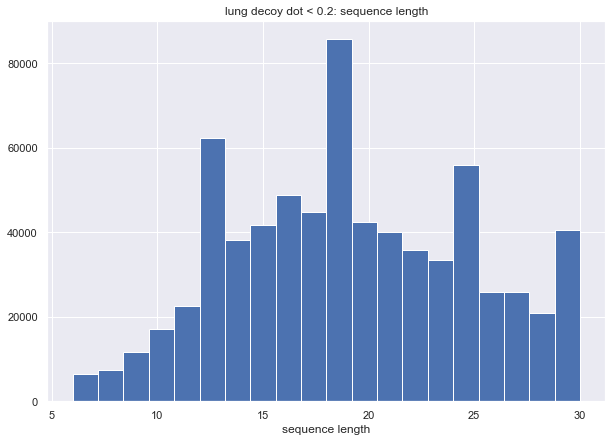

In [9]:
plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.title('lung decoy dot < 0.2: sequence length')
seq_length = plt.hist(seq_len, bins = 20)

1.2000000000000002


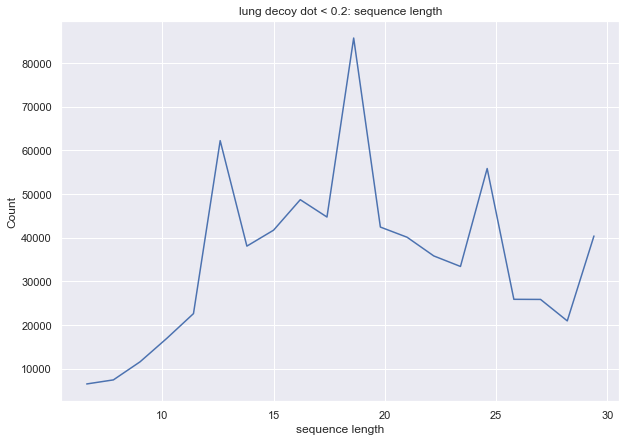

In [10]:
print(seq_length[1][1] - seq_length[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.ylabel('Count')
plt.title('lung decoy dot < 0.2: sequence length')
plt.plot(seq_length[1][:-1] + 0.6, seq_length[0])
plt.show()

In [11]:
ch_state = []
for i in lungd1:
    ch_state.append(int(i[-1]))
ch_state

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 3,
 3,
 4,
 2,
 3,
 4,
 4,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 4,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,


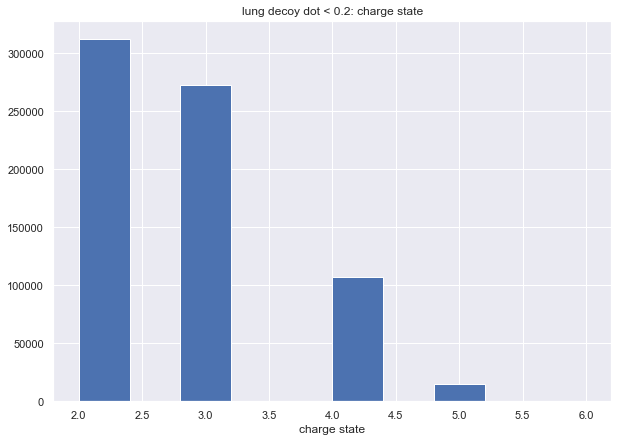

In [12]:
plt.figure(figsize = (10, 7))
plt.title('lung decoy dot < 0.2: charge state')
plt.xlabel('charge state')
charge_state = plt.hist(ch_state, bins = 10)

In [13]:
c_term = []
for i in lungd1:
    c_term.append(i[-3])
c_term

['K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K'

In [14]:
counter1 = Counter(c_term)
counter1

Counter({'K': 355544,
         'R': 345411,
         'T': 151,
         'E': 694,
         'Q': 640,
         'D': 635,
         'L': 625,
         'S': 778,
         'G': 141,
         'M': 235,
         'F': 416,
         'H': 489,
         'V': 284,
         'N': 370,
         'P': 269,
         'A': 404,
         'I': 125,
         'Y': 282,
         'W': 21})

<function matplotlib.pyplot.show(close=None, block=None)>

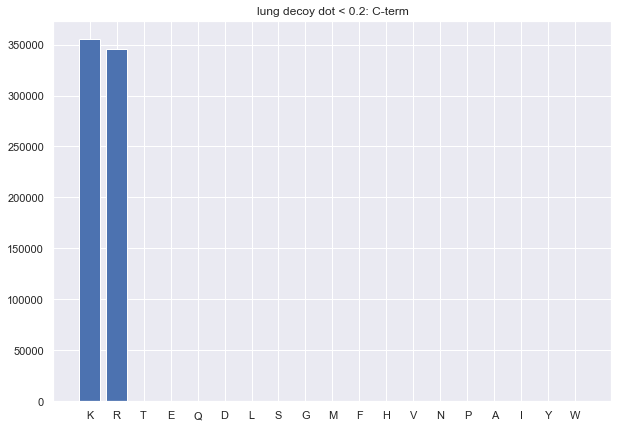

In [15]:
plt.figure(figsize = (10, 7))
plt.title('lung decoy dot < 0.2: C-term')
plt.bar(counter1.keys(), counter1.values())
plt.show

In [16]:
seq = []
for i in lungd1:
    seq.append(i[:-2])
seq

['LISITSINDSK',
 'DAVDRDGPDLYR',
 'QNGWPDAEVDQR',
 'GPIPLLSGKIK',
 'TQLDNPALFPK',
 'TINIETEFQNK',
 'LLLLFGAVASK',
 'GVEATVQDAQETFSDTMK',
 'DAVDRDGPDLYR',
 'YGLFATLHVPK',
 'IALSFVAAALK',
 'EKLAVLVAKR',
 'DAVDRDGPDLYR',
 'YTAIEIDLAMR',
 'INVSDAPLALK',
 'SWWDVIEEEK',
 'DIDLVMSPNSQEK',
 'GPIPLLSGKIK',
 'DAVDRDGPDLYR',
 'VKDAPEATTAIK',
 'LIQVLIMNLK',
 'VPELLDALVLK',
 'PLLPSDSNYDLHVPPPPTPLATLSK',
 'HLLELINGESFR',
 'YFDEITPDYR',
 'LEKEKVLLK',
 'LLLLHLLATR',
 'HTVLPKVNVSR',
 'VVDKLATAAKK',
 'LPDPLPLSLVK',
 'YLALIGPLLK',
 'QLPPTEAAPSR',
 'VVINNSVAAGR',
 'LEKEKVLLK',
 'GPIPLLSGKIK',
 'PLLEEQALFGK',
 'LLLLHLLATR',
 'TIPKFPAPVR',
 'ELIFTPLVVK',
 'HILANFALGDK',
 'ITVAPKIQQK',
 'VESISSVQSSVVK',
 'IEPSSSSENADTR',
 'DAVDRDGPDLYR',
 'DLAEQLGQTLR',
 'QAGHIEYLQLQK',
 'LLDVNLIVVK',
 'MQALEQQQMER',
 'VVDKLATAAKK',
 'EGFTSYSGDYHR',
 'PQLWAPLALPGR',
 'GPIPLLSGKIK',
 'MIVAPDEVKSR',
 'GPIGVIPKELK',
 'PEDVSAEDDFLR',
 'GPIPLLSGKIK',
 'NISLLLFKR',
 'HVLDIIPKVK',
 'TLLIITEFATK',
 'LSSSDQDDDQDVK',
 'WESESMLHTR',
 '

In [17]:
amino_acid = []
for i in seq:
    for j in i:
        amino_acid.append(j)
amino_acid

['L',
 'I',
 'S',
 'I',
 'T',
 'S',
 'I',
 'N',
 'D',
 'S',
 'K',
 'D',
 'A',
 'V',
 'D',
 'R',
 'D',
 'G',
 'P',
 'D',
 'L',
 'Y',
 'R',
 'Q',
 'N',
 'G',
 'W',
 'P',
 'D',
 'A',
 'E',
 'V',
 'D',
 'Q',
 'R',
 'G',
 'P',
 'I',
 'P',
 'L',
 'L',
 'S',
 'G',
 'K',
 'I',
 'K',
 'T',
 'Q',
 'L',
 'D',
 'N',
 'P',
 'A',
 'L',
 'F',
 'P',
 'K',
 'T',
 'I',
 'N',
 'I',
 'E',
 'T',
 'E',
 'F',
 'Q',
 'N',
 'K',
 'L',
 'L',
 'L',
 'L',
 'F',
 'G',
 'A',
 'V',
 'A',
 'S',
 'K',
 'G',
 'V',
 'E',
 'A',
 'T',
 'V',
 'Q',
 'D',
 'A',
 'Q',
 'E',
 'T',
 'F',
 'S',
 'D',
 'T',
 'M',
 'K',
 'D',
 'A',
 'V',
 'D',
 'R',
 'D',
 'G',
 'P',
 'D',
 'L',
 'Y',
 'R',
 'Y',
 'G',
 'L',
 'F',
 'A',
 'T',
 'L',
 'H',
 'V',
 'P',
 'K',
 'I',
 'A',
 'L',
 'S',
 'F',
 'V',
 'A',
 'A',
 'A',
 'L',
 'K',
 'E',
 'K',
 'L',
 'A',
 'V',
 'L',
 'V',
 'A',
 'K',
 'R',
 'D',
 'A',
 'V',
 'D',
 'R',
 'D',
 'G',
 'P',
 'D',
 'L',
 'Y',
 'R',
 'Y',
 'T',
 'A',
 'I',
 'E',
 'I',
 'D',
 'L',
 'A',
 'M',
 'R',
 'I',
 'N',
 'V'

In [23]:
counter2 = Counter(amino_acid)
sorted(counter2.items())

[('A', 930750),
 ('D', 1074418),
 ('E', 1452860),
 ('F', 460477),
 ('G', 914250),
 ('H', 436218),
 ('I', 504895),
 ('K', 576008),
 ('L', 1105898),
 ('M', 276757),
 ('N', 527280),
 ('P', 874967),
 ('Q', 695946),
 ('R', 479256),
 ('S', 1152547),
 ('T', 707378),
 ('V', 744707),
 ('W', 140789),
 ('Y', 409375)]

<function matplotlib.pyplot.show(close=None, block=None)>

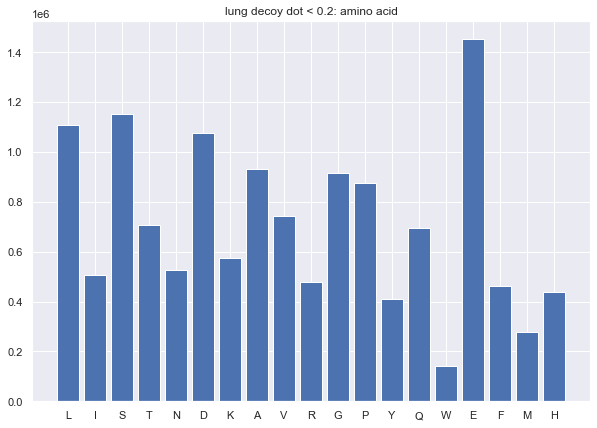

In [19]:
plt.figure(figsize = (10, 7))
plt.title('lung decoy dot < 0.2: amino acid')
plt.bar(counter2.keys(), counter2.values())
plt.show

In [20]:
lungD2 = lungD.loc[:, ['MzDiff']]
lungD2.head()

,MzDiff
0,0.0051
1,0.4930
2,0.5050
3,0.0070
4,0.5060


In [21]:
lungd2 = lungD2.values.tolist()
lungd2 = np.concatenate(lungd2).tolist()
lungd2

[0.0051,
 0.493,
 0.505,
 0.007,
 0.506,
 0.008,
 0.51,
 0.004,
 0.49,
 0.009,
 0.494,
 -0.001,
 0.49,
 0.508,
 0.01,
 -0.005,
 0.494,
 0.004,
 0.492,
 0.498,
 0.01,
 0.501,
 0.341,
 0.503,
 -0.002,
 0.502,
 -0.01,
 0.509,
 0.505,
 0.49,
 0.002,
 0.005,
 0.002,
 0.502,
 0.003,
 -0.003,
 -0.009,
 0.504,
 0.003,
 0.002,
 0.498,
 0.004,
 0.006,
 0.491,
 0.509,
 0.5,
 0.502,
 0.497,
 0.503,
 0.008,
 0.006,
 0.005,
 0.505,
 0.005,
 0.003,
 0.005,
 0.505,
 0.508,
 0.507,
 0.493,
 -0.003,
 0.494,
 0.507,
 0.005,
 0.492,
 0.003,
 0.004,
 0.502,
 0.5,
 0.508,
 0.501,
 0.006,
 -0.003,
 0.492,
 0.497,
 0.002,
 0.01,
 0.008,
 0.509,
 0.003,
 0.0,
 0.006,
 0.004,
 0.328,
 -0.007,
 -0.007,
 0.502,
 -0.009,
 0.49,
 0.502,
 -0.003,
 0.509,
 0.002,
 0.492,
 0.495,
 0.007,
 0.497,
 0.503,
 0.502,
 0.004,
 0.491,
 0.506,
 -0.001,
 0.005,
 0.002,
 0.005,
 0.51,
 -0.004,
 0.509,
 0.493,
 0.501,
 0.505,
 0.509,
 0.507,
 -0.008,
 -0.007,
 -0.001,
 0.004,
 0.492,
 0.503,
 -0.003,
 0.506,
 0.502,
 0.0,
 -0.007

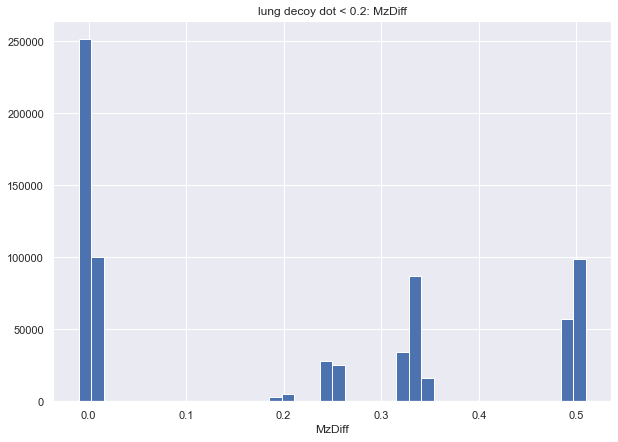

In [22]:
plt.figure(figsize = (10, 7))
plt.xlabel('MzDiff')
plt.title('lung decoy dot < 0.2: MzDiff')
MzDiff = plt.hist(lungd2, bins = 40)